In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [10]:
n = 6
x = np.random.normal(size=(n, 2))

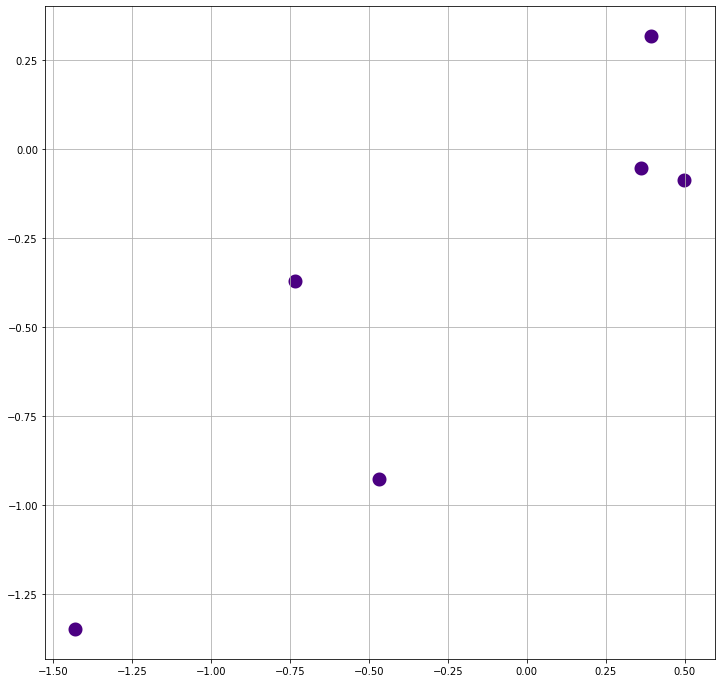

In [11]:
plt.figure(figsize=(12, 12))
plt.scatter(x[:, 0], x[:, 1], color='indigo', linewidths=8)
plt.grid(True)
plt.show()

In [12]:
outlier = np.max(abs(x))
outlier

1.4298878264703563

In [13]:
distance = x[:]*np.ones([x.shape[0], x.shape[0], 2])
distance = distance - np.transpose(distance, axes=(1, 0, 2))
distance = np.linalg.norm(distance, axis=2)
distance[:4, :4]

array([[0.        , 0.3722423 , 0.4182116 , 2.46915815],
       [0.3722423 , 0.        , 0.13995524, 2.21154205],
       [0.4182116 , 0.13995524, 0.        , 2.30461285],
       [2.46915815, 2.21154205, 2.30461285, 0.        ]])

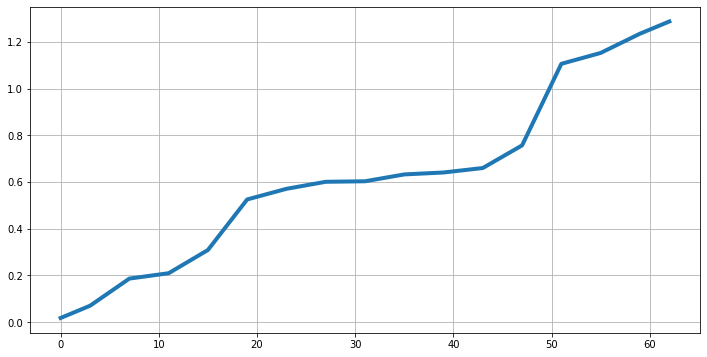

In [22]:
n_radius_cloned = 4
radiuses = 0.5*np.unique(distance[distance != 0])
radiuses = np.repeat(radiuses, n_radius_cloned)
radius_last = radiuses[-1] + radiuses[0]
radiuses = np.array(
    [
        np.concatenate([np.zeros(i), radiuses, radius_last*np.ones(n_radius_cloned-1-i)]) for i in range(n_radius_cloned)
    ]
)
radiuses = np.sum(radiuses, axis=0)/n_radius_cloned

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(radiuses)), radiuses, linewidth=4)
plt.grid(True)
plt.show()

/tmp/ipykernel_27635/1122863995.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 12))


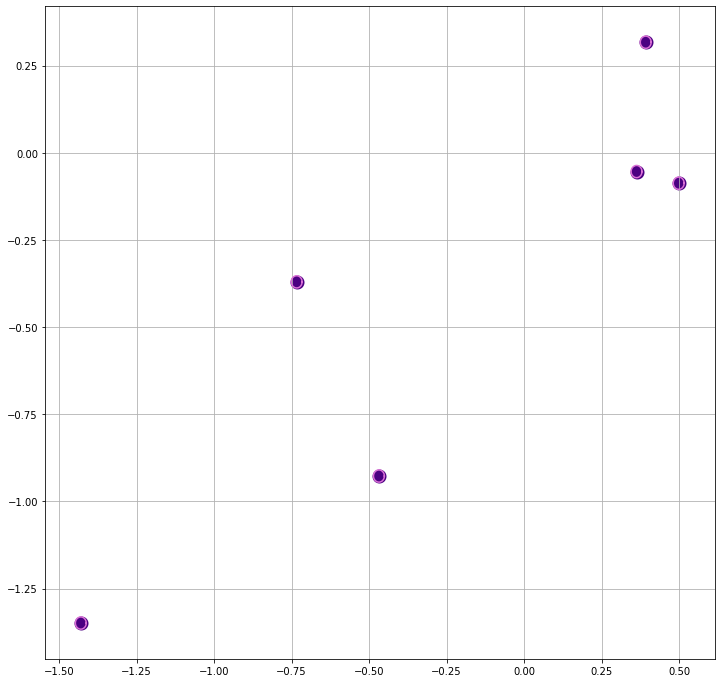

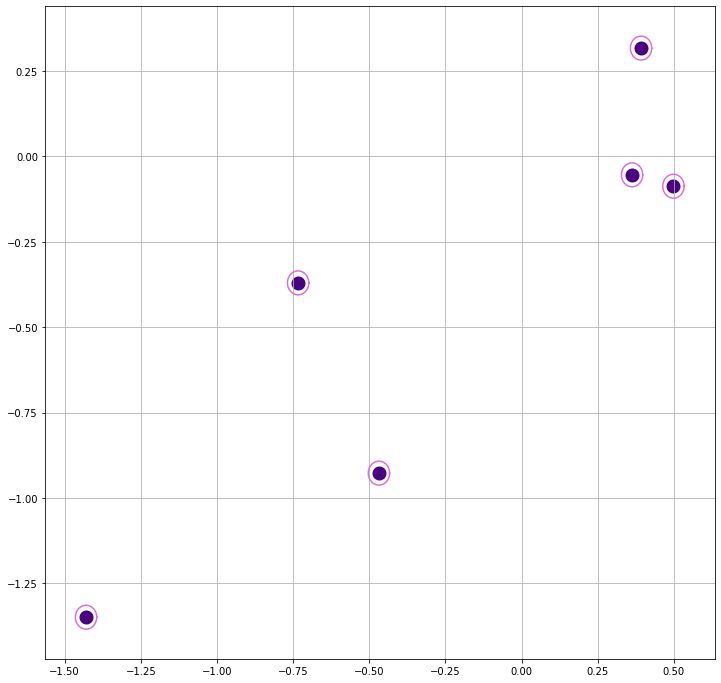

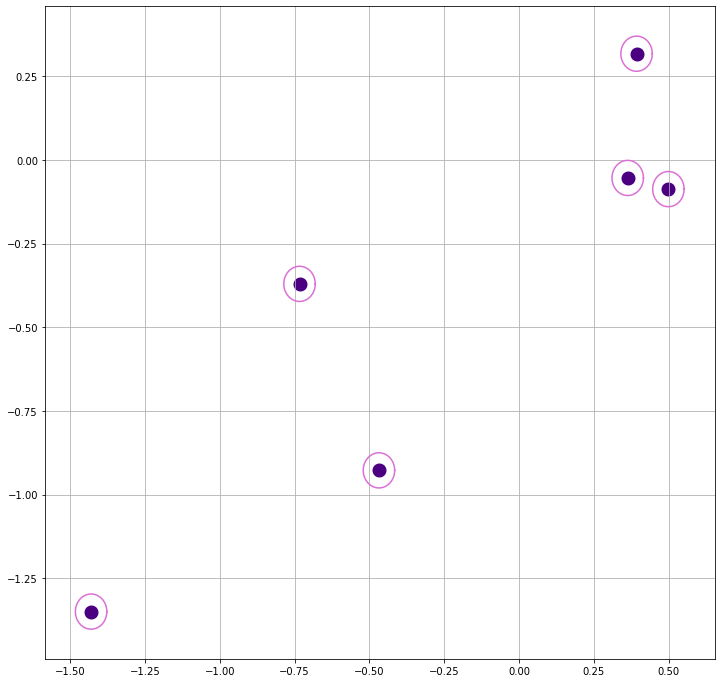

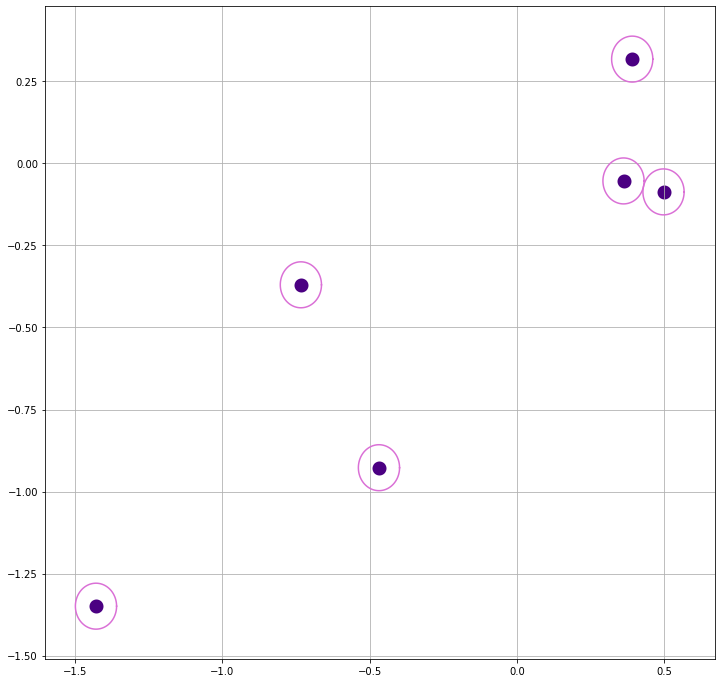

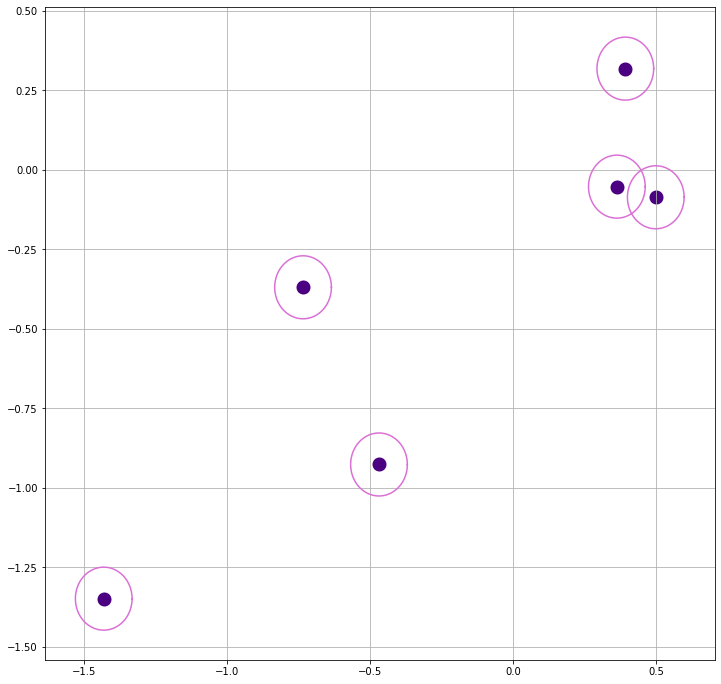

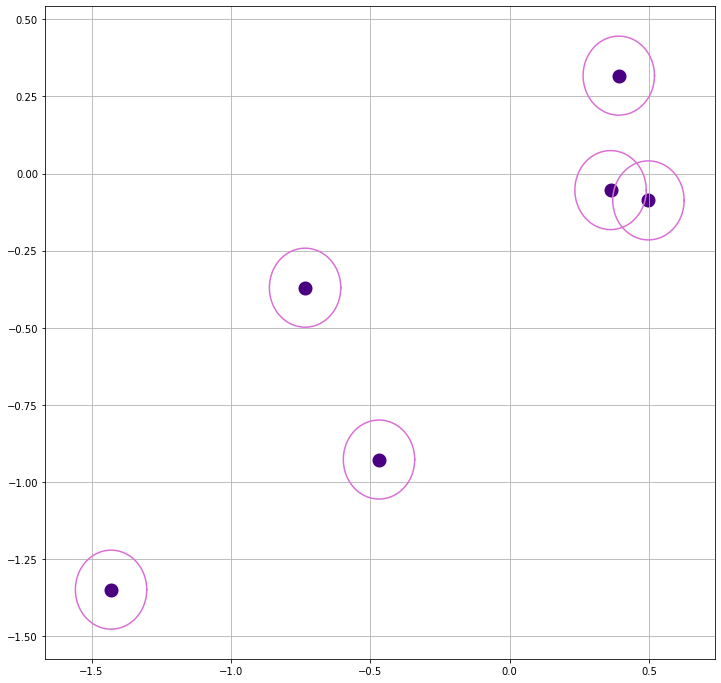

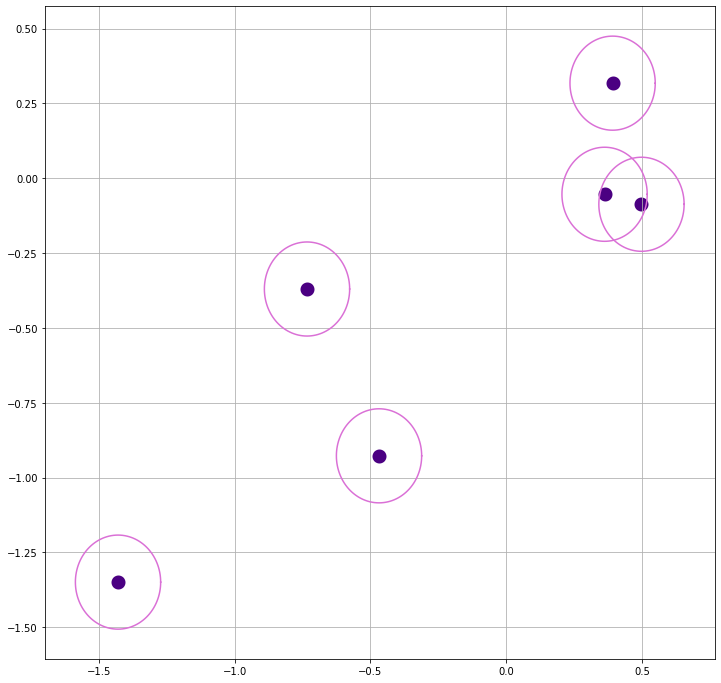

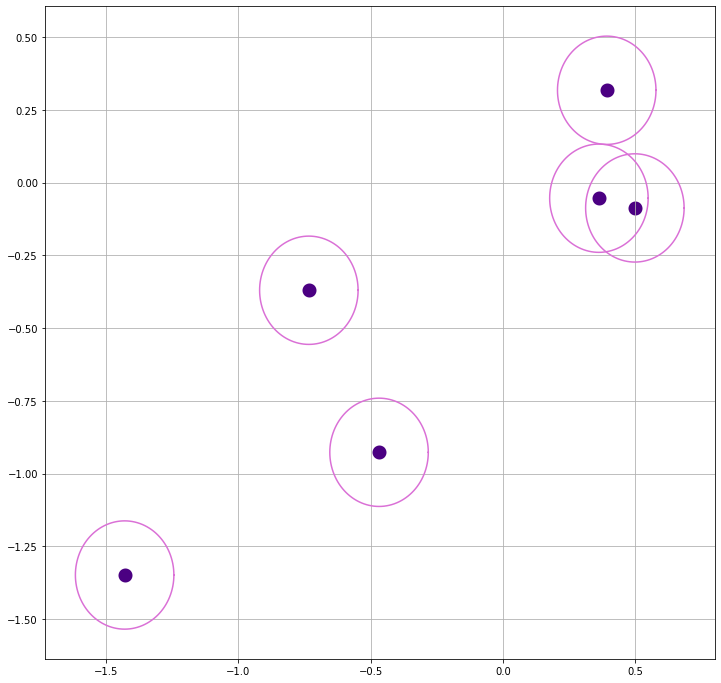

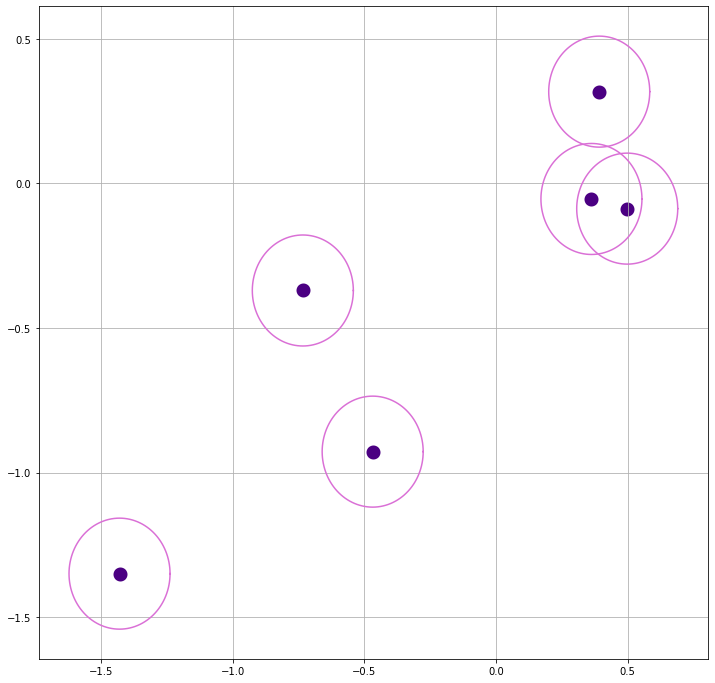

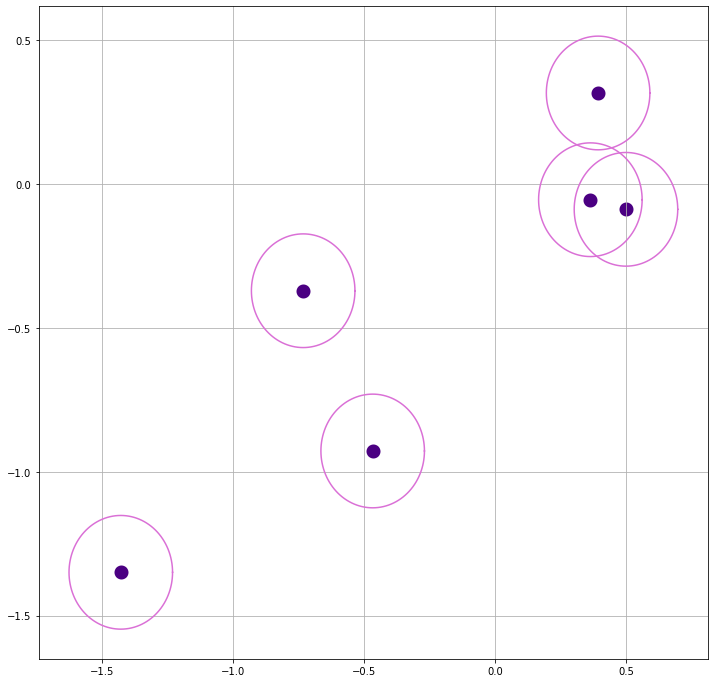

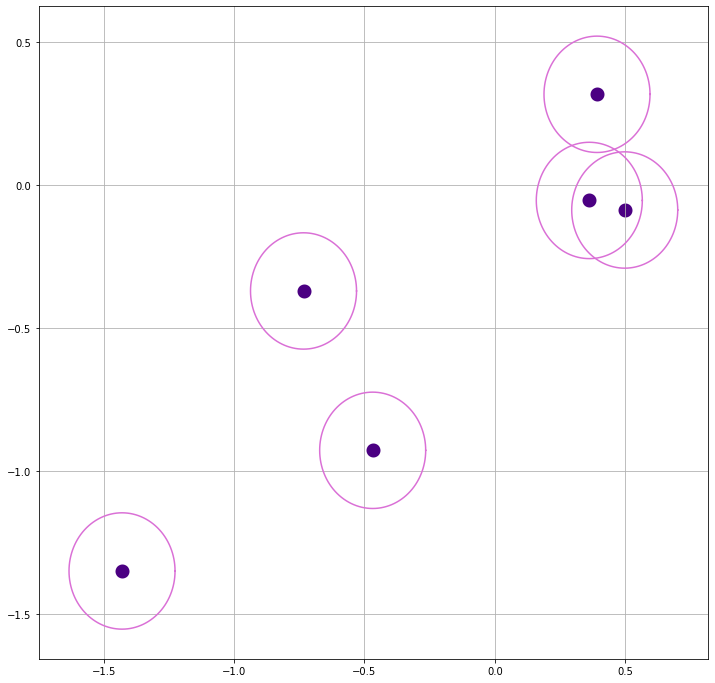

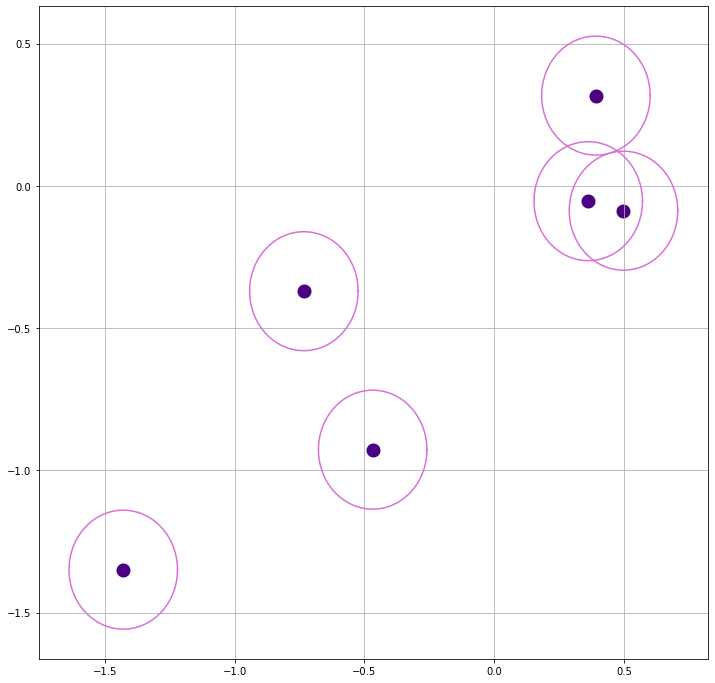

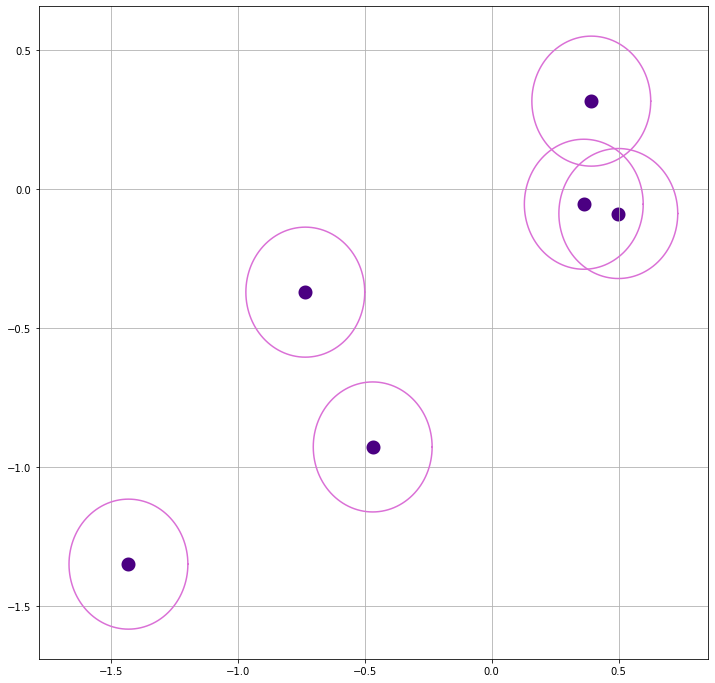

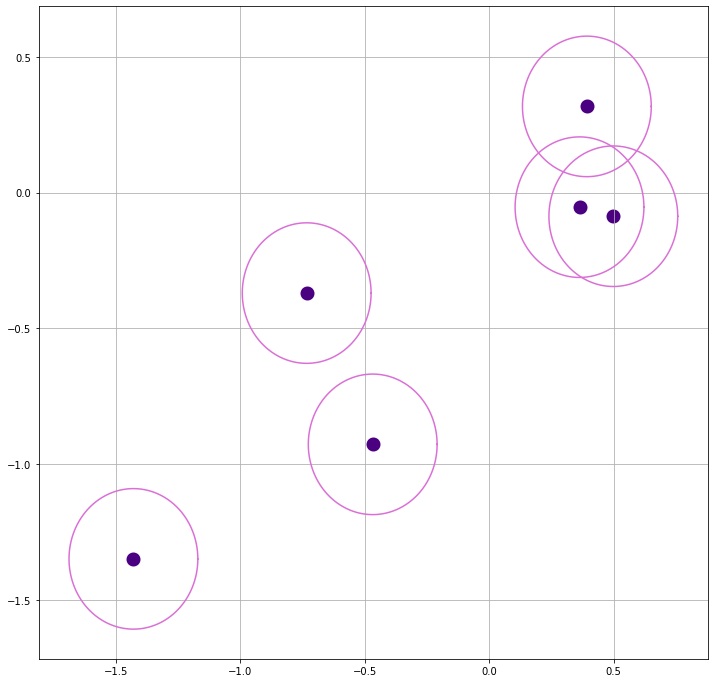

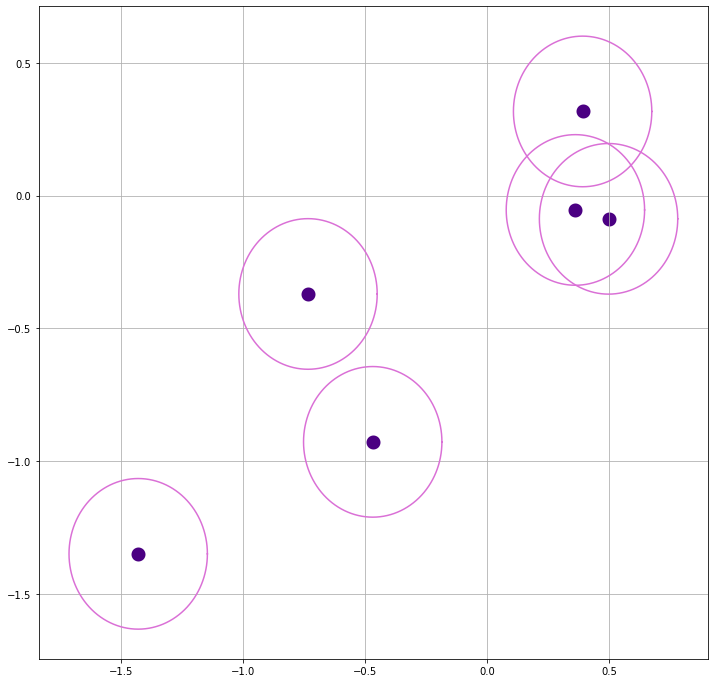

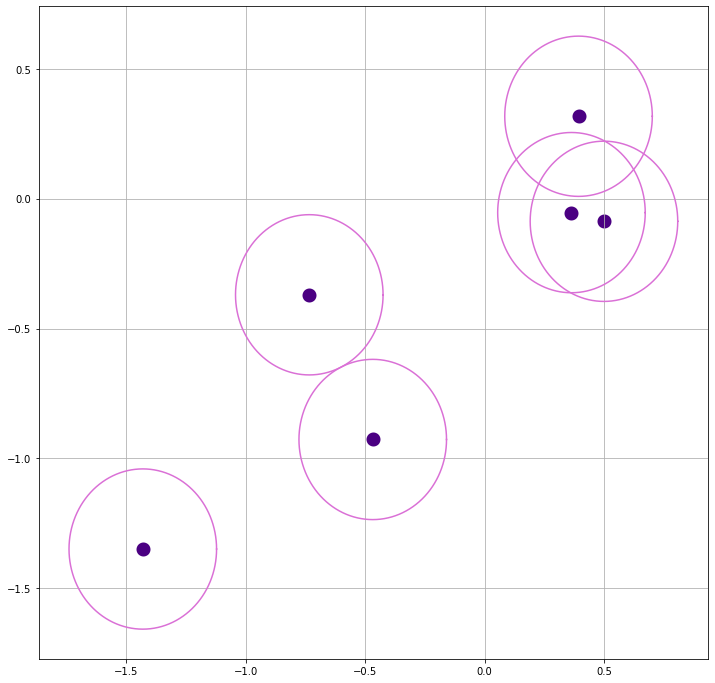

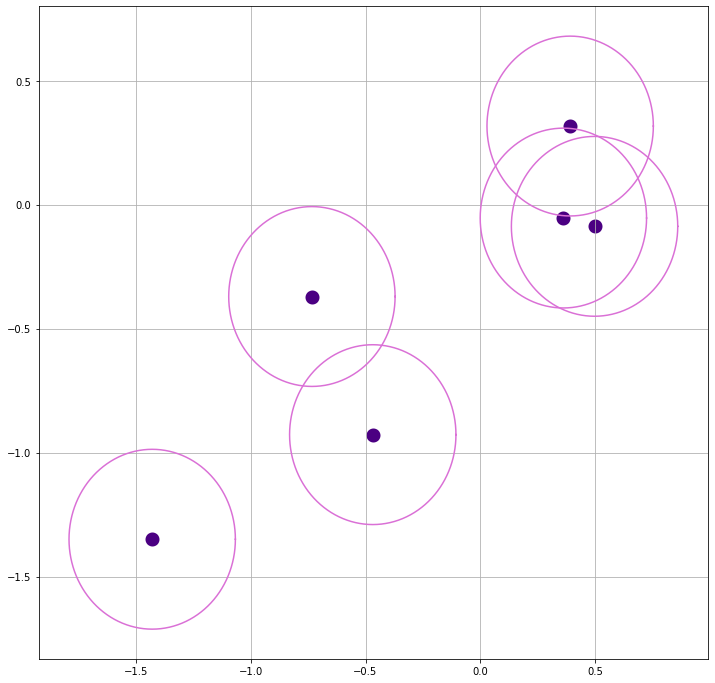

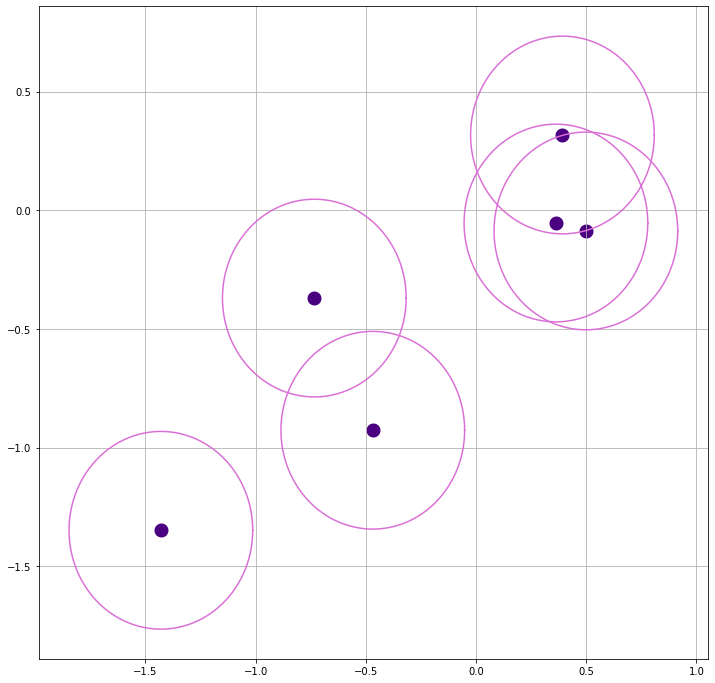

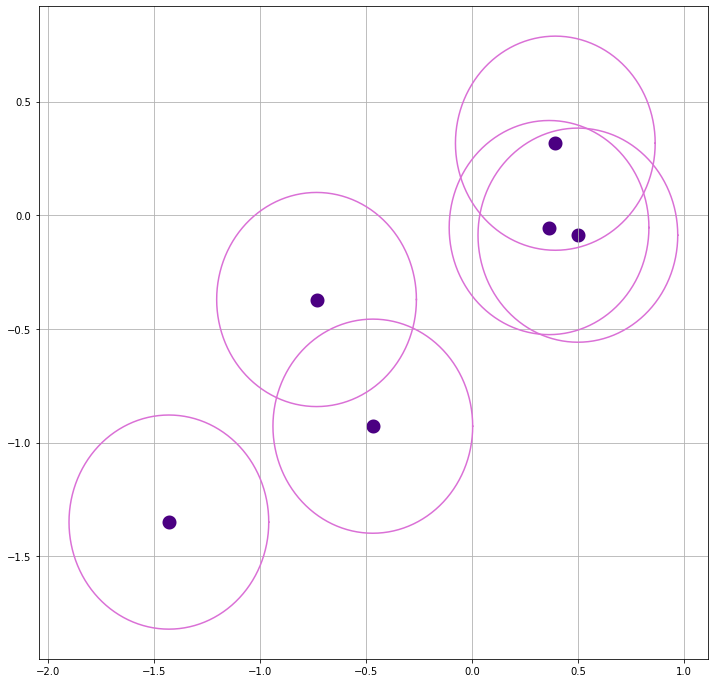

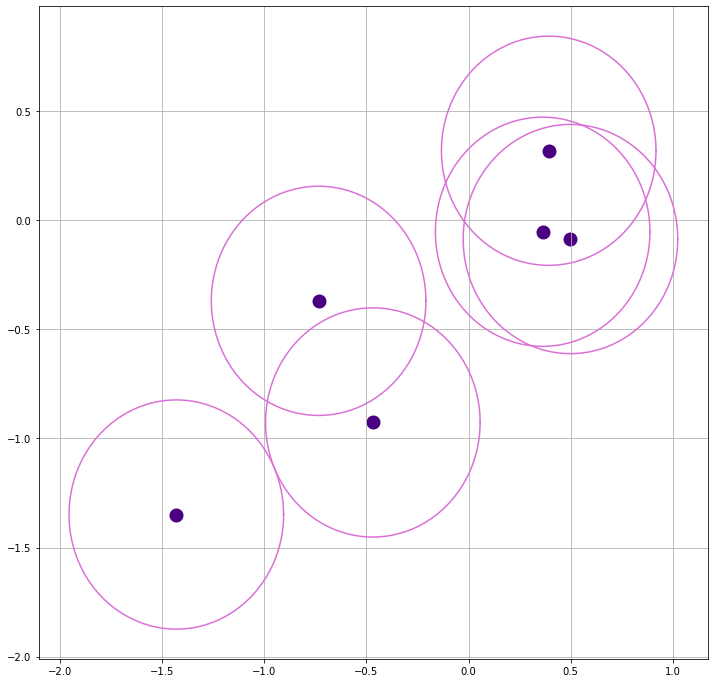

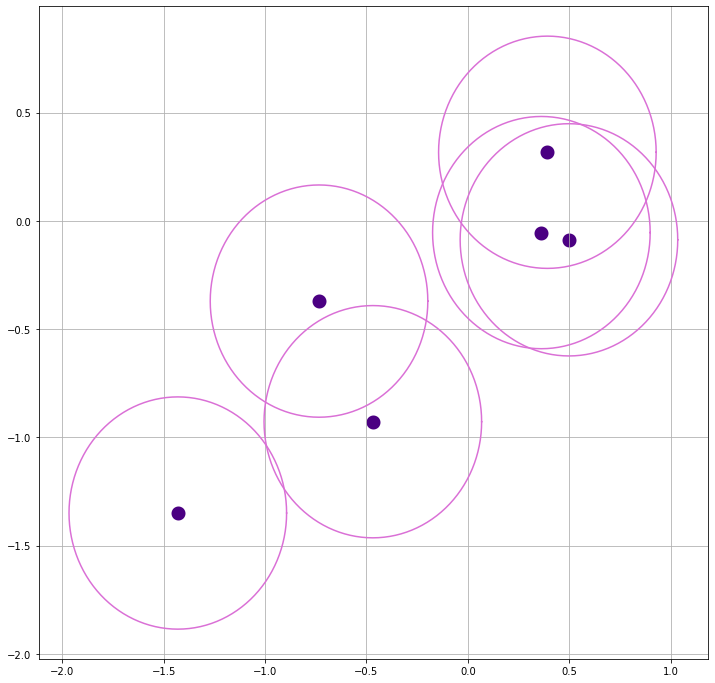

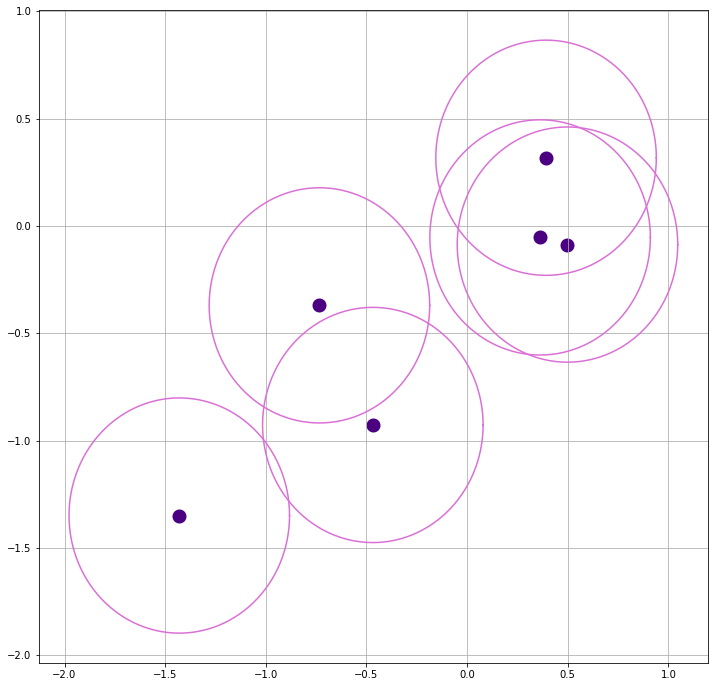

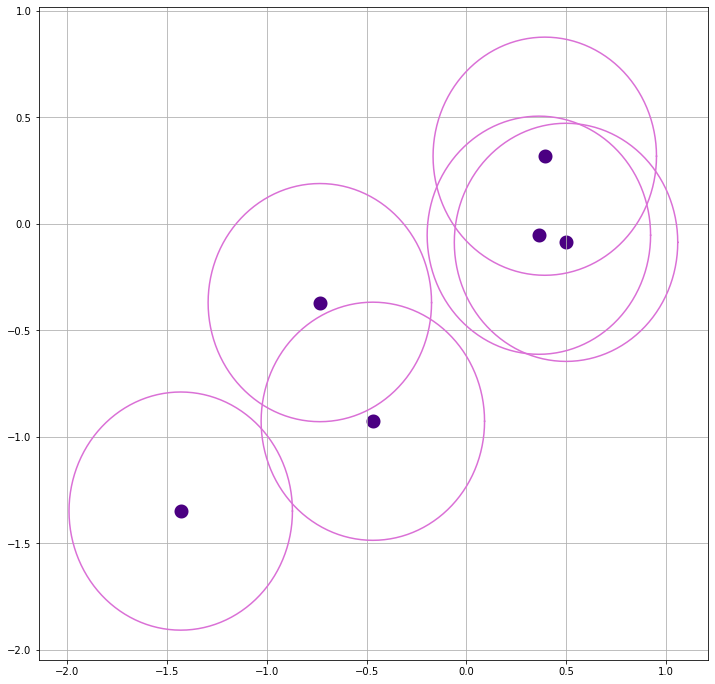

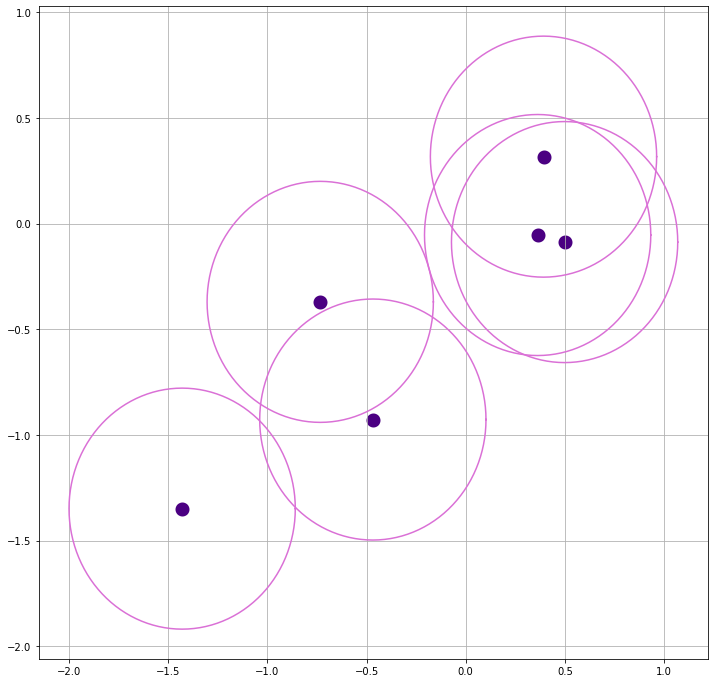

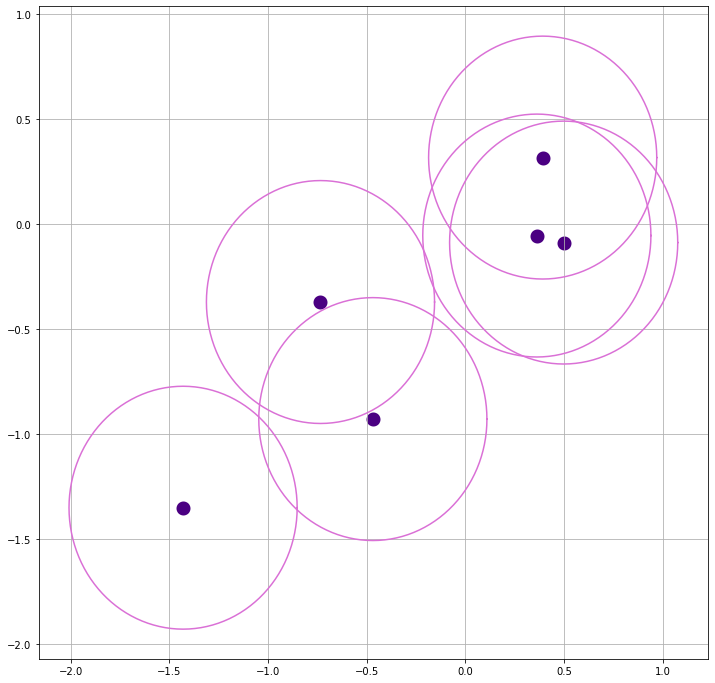

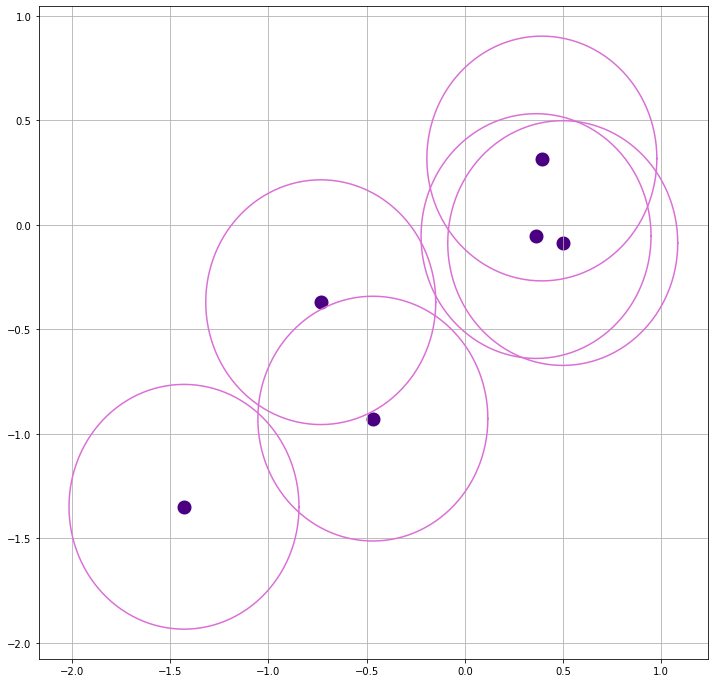

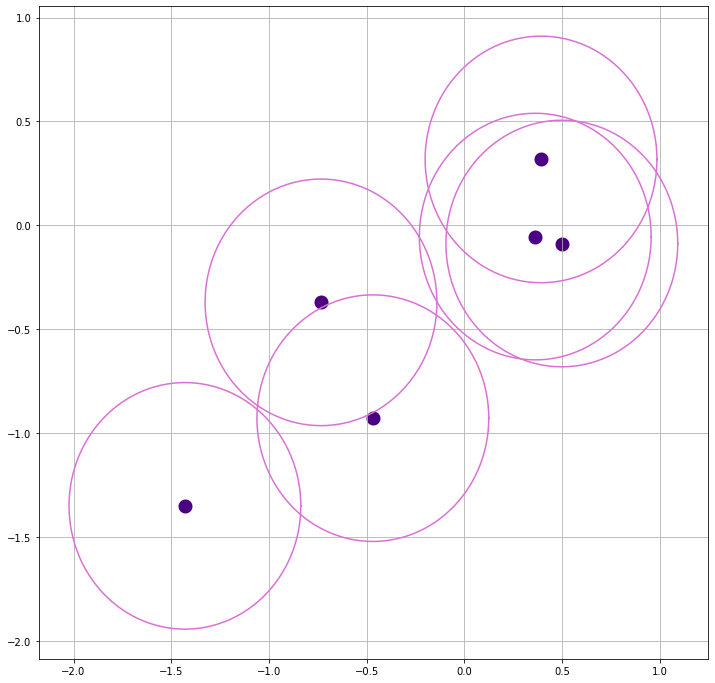

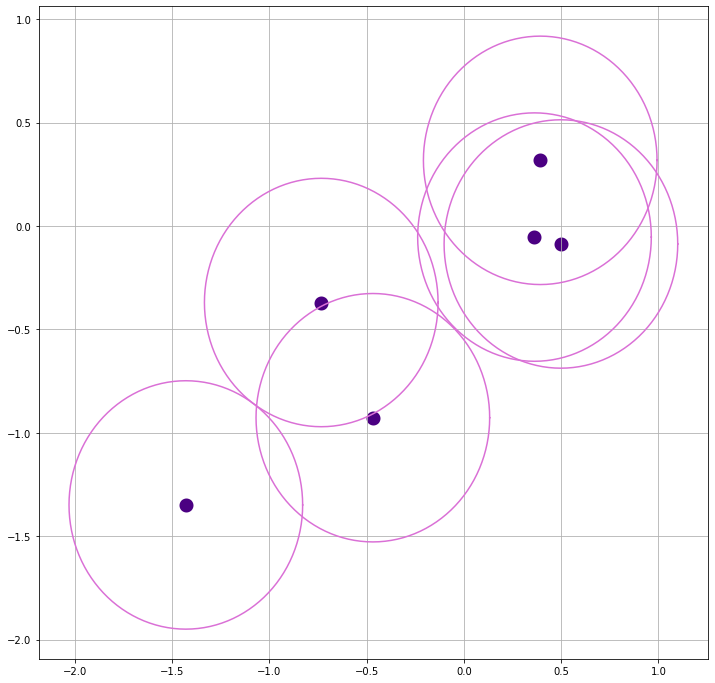

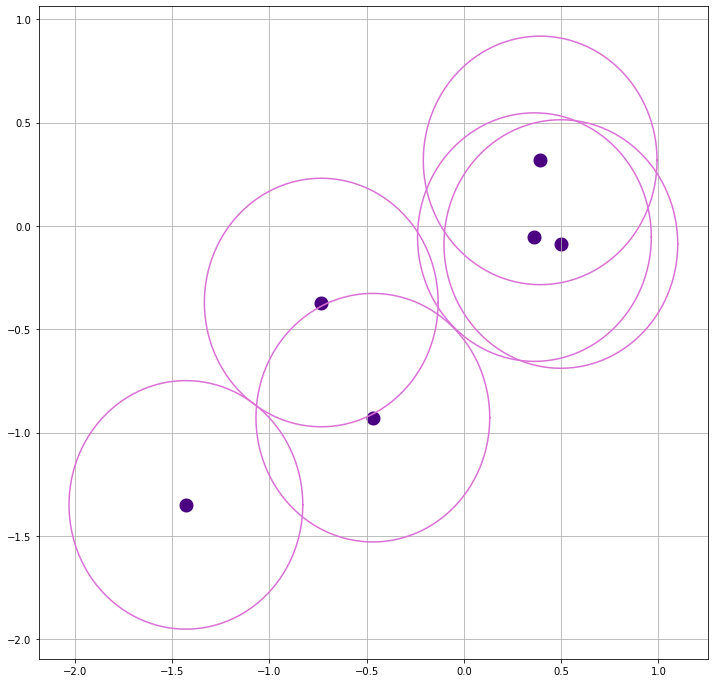

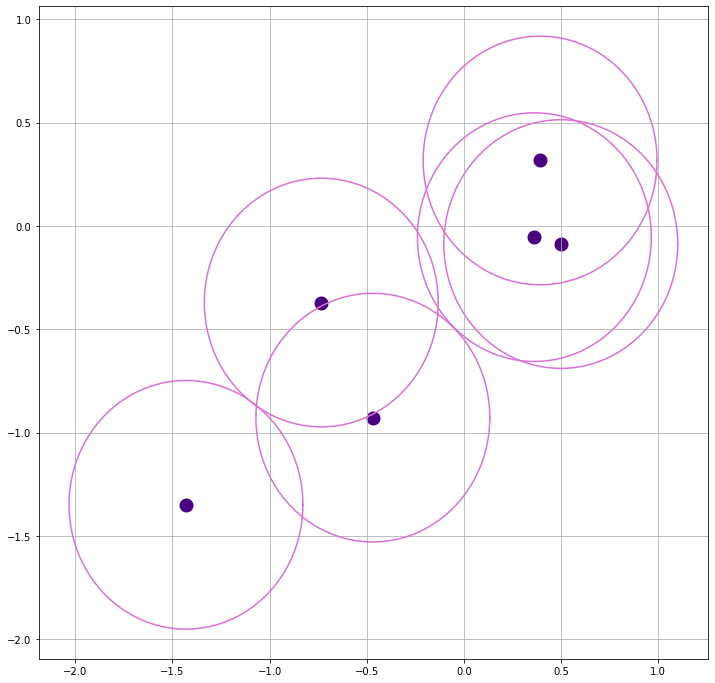

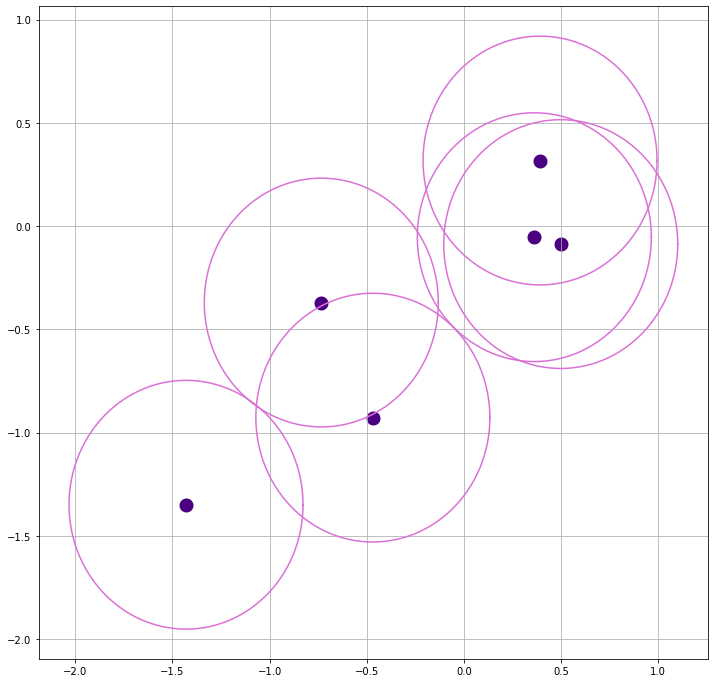

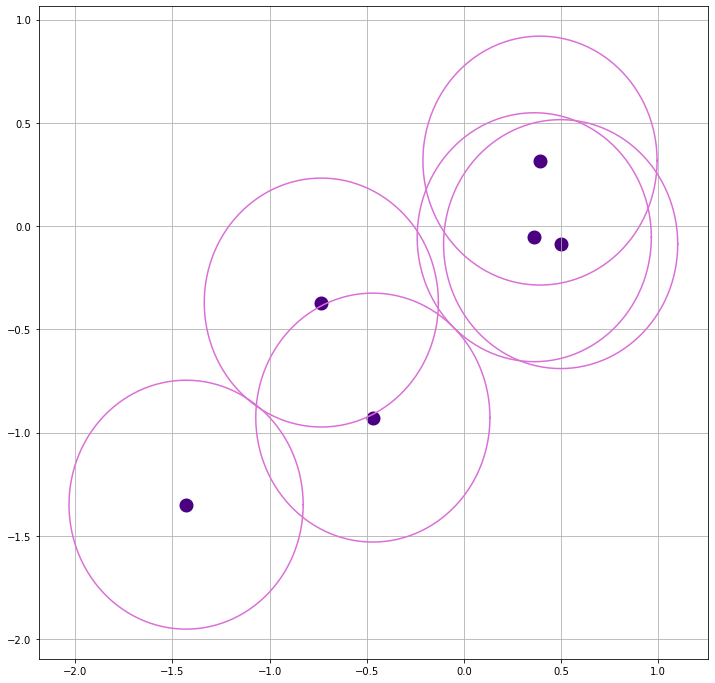

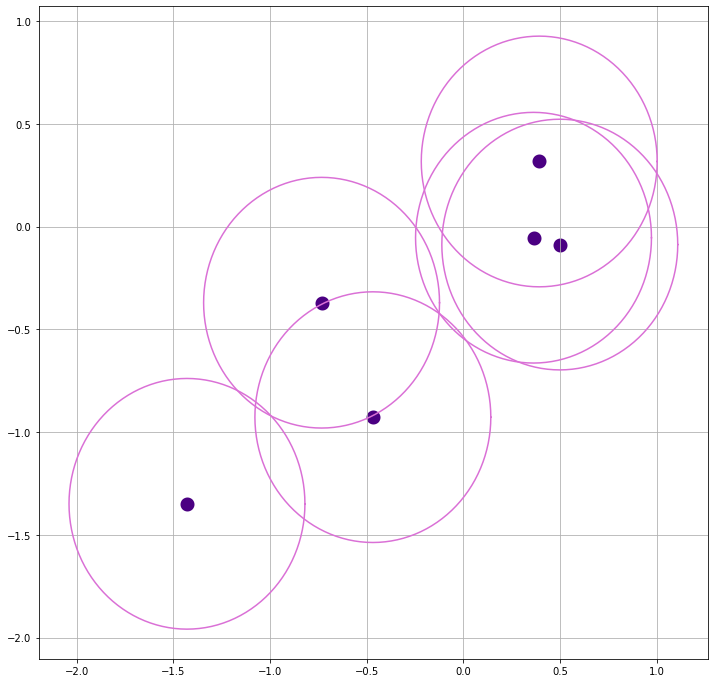

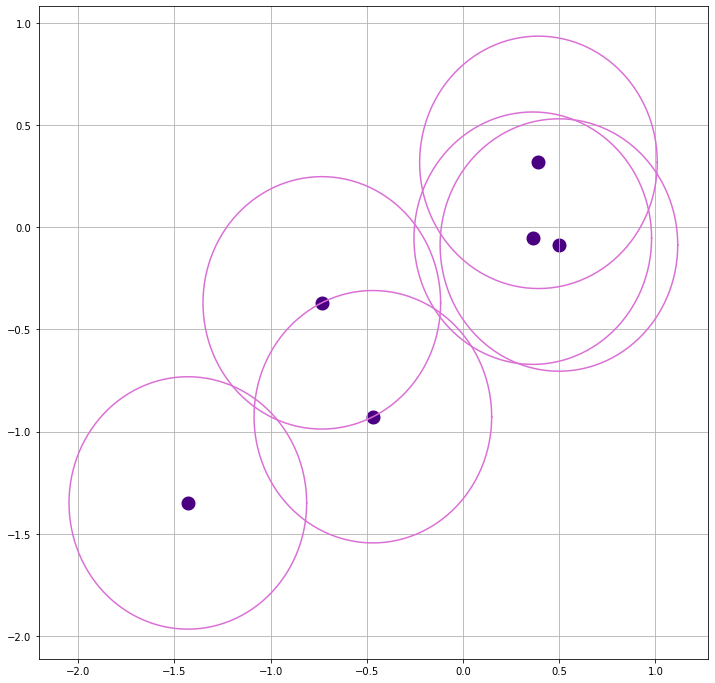

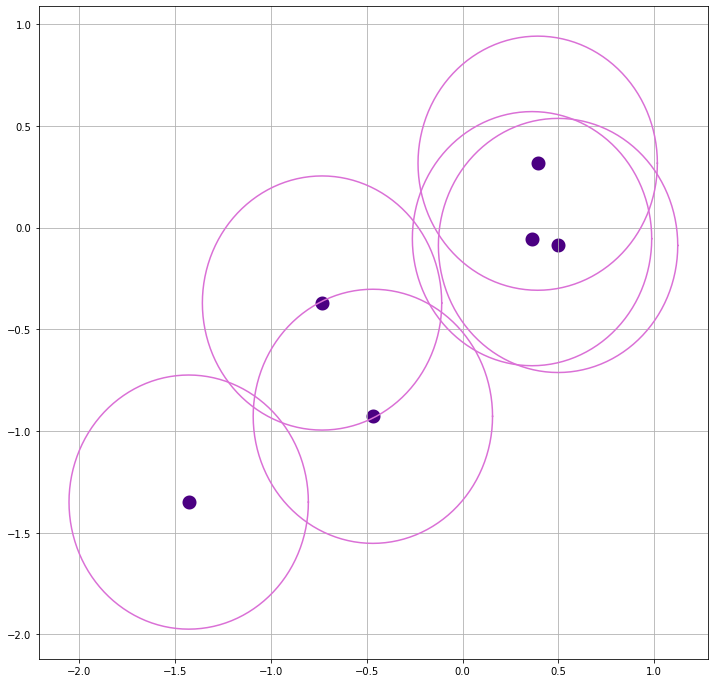

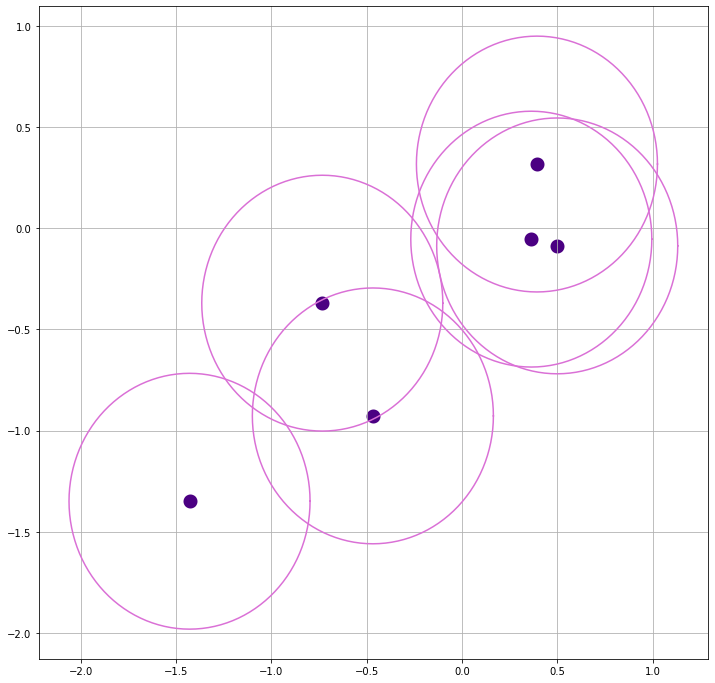

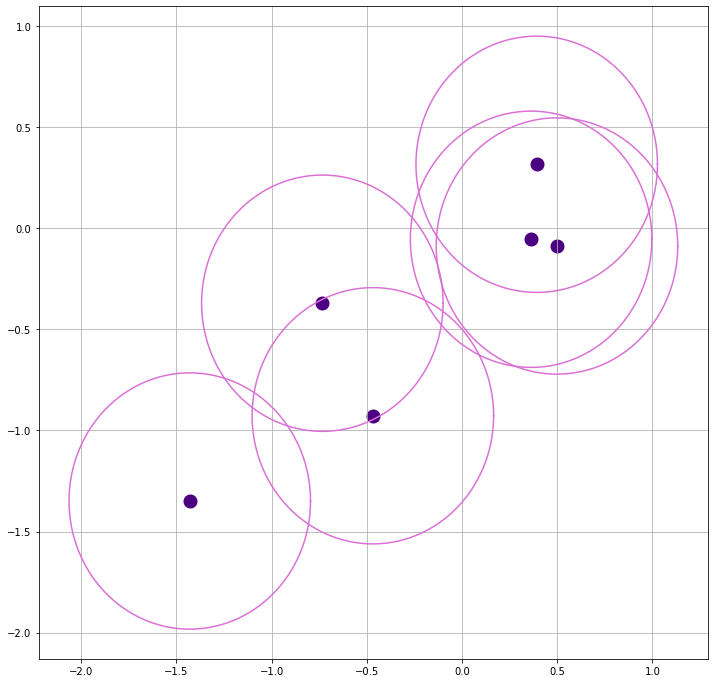

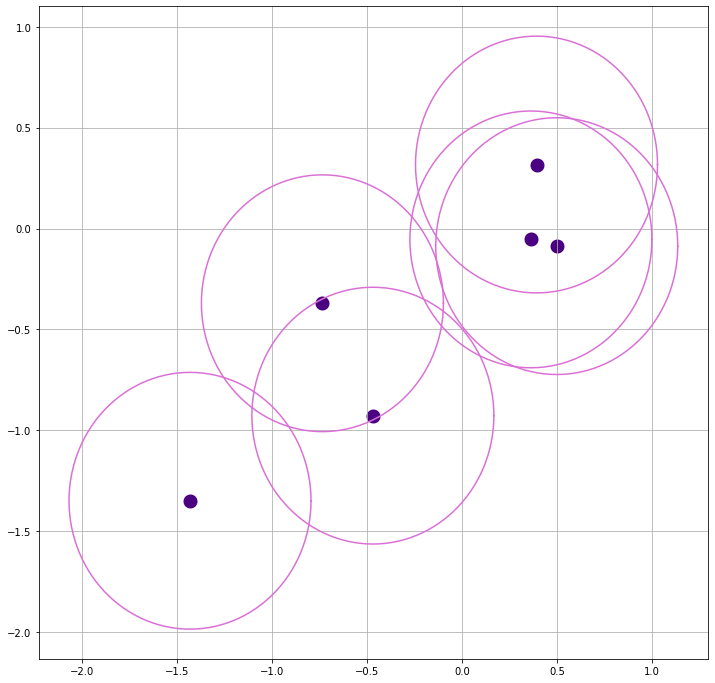

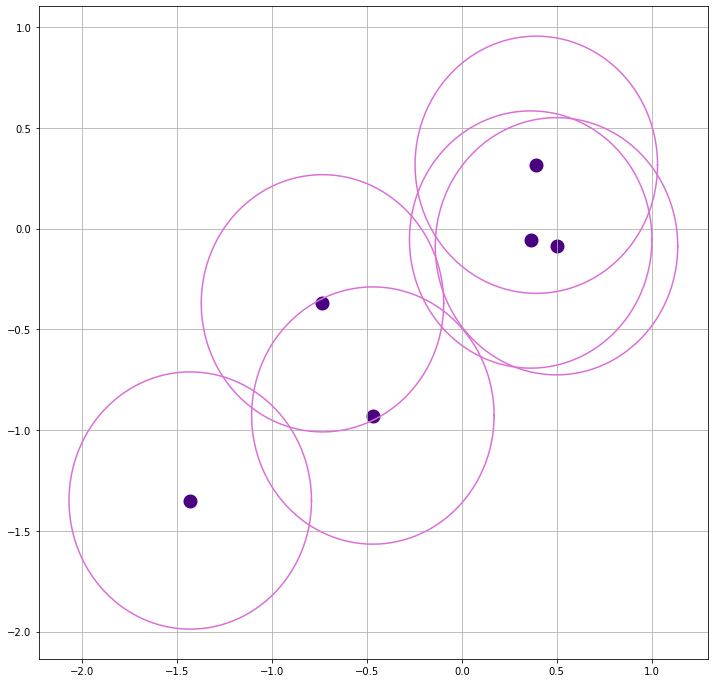

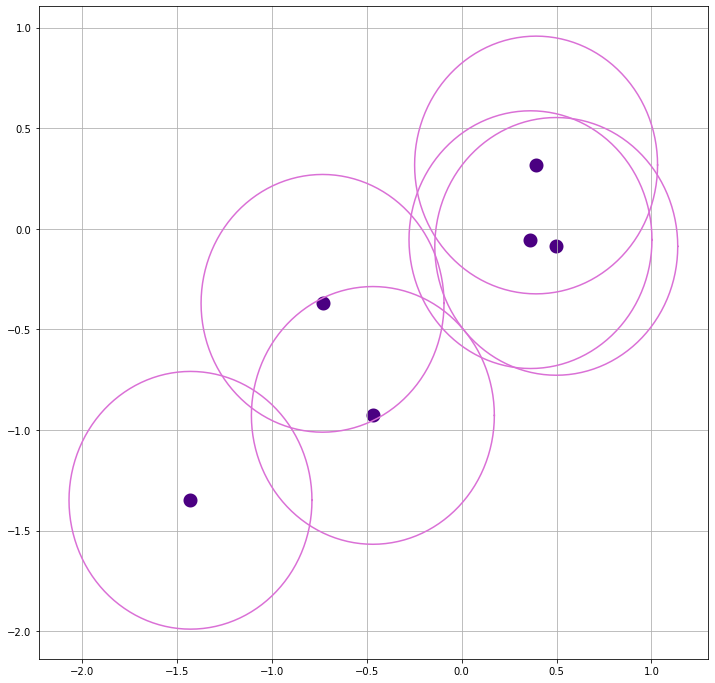

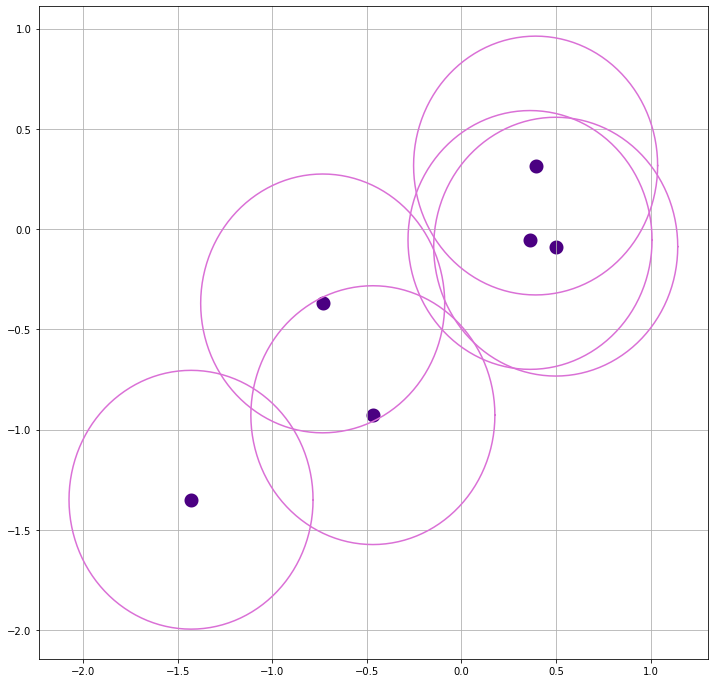

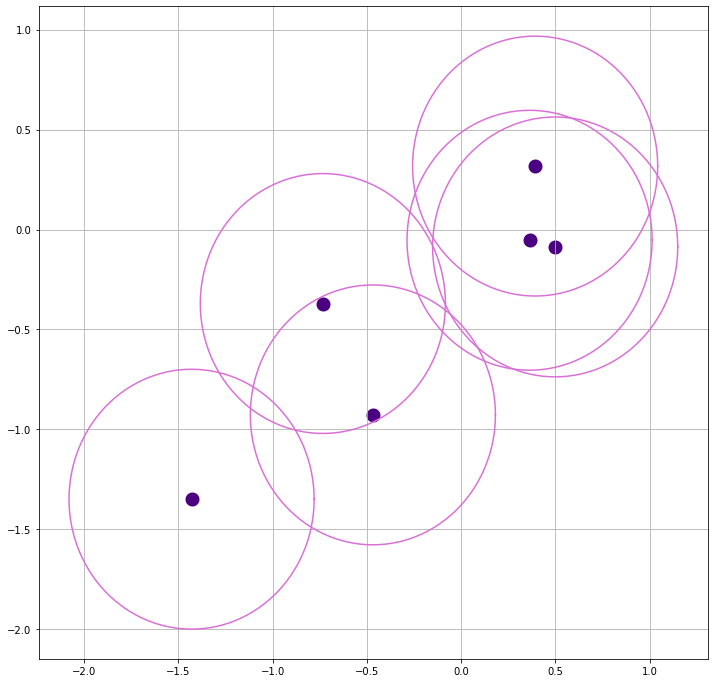

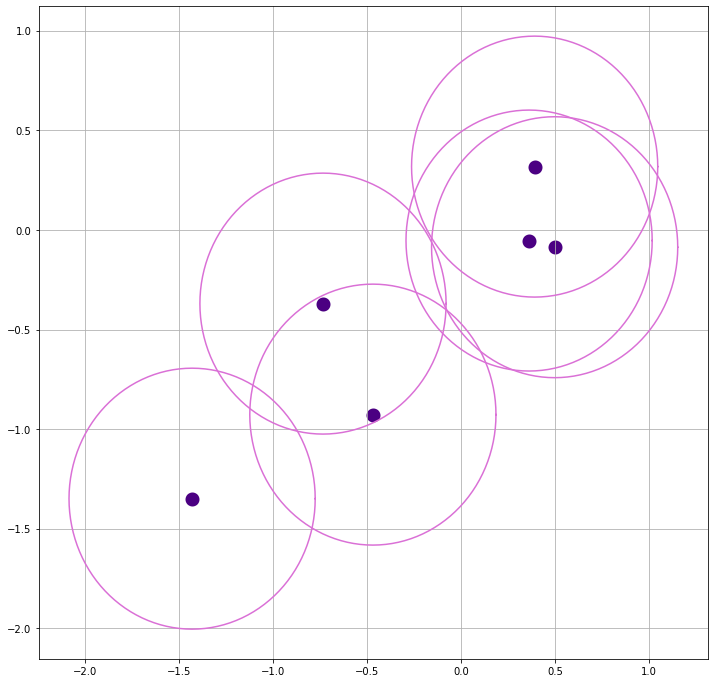

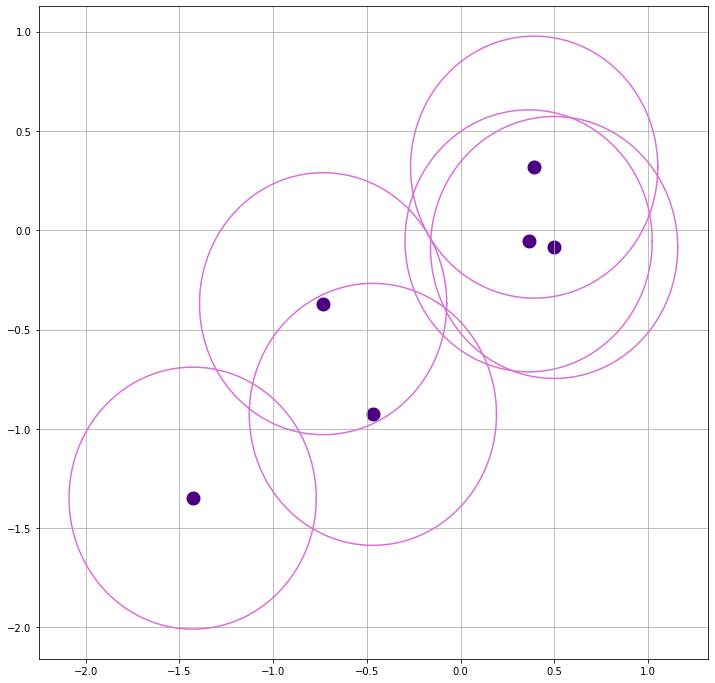

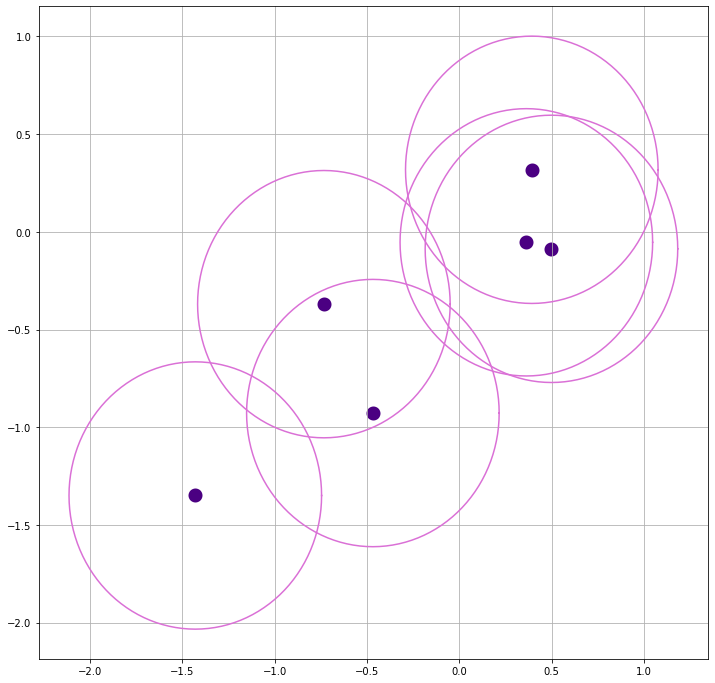

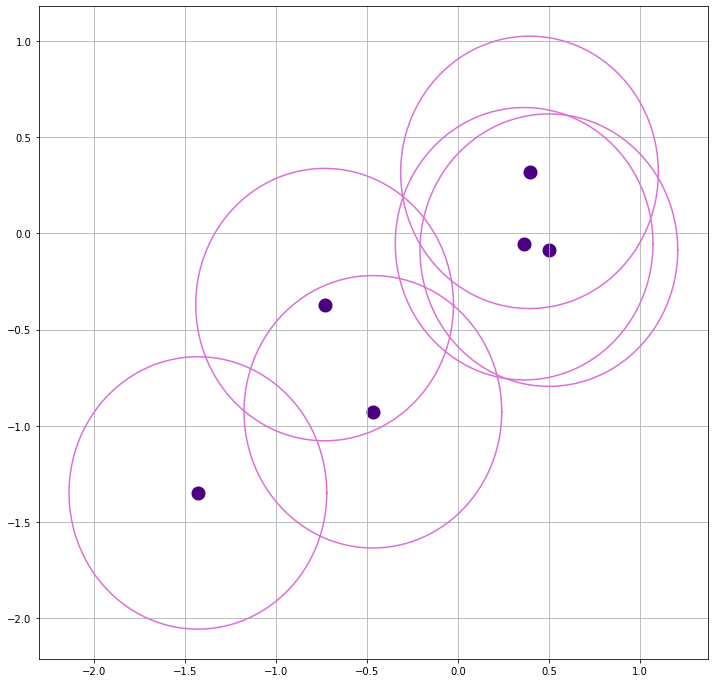

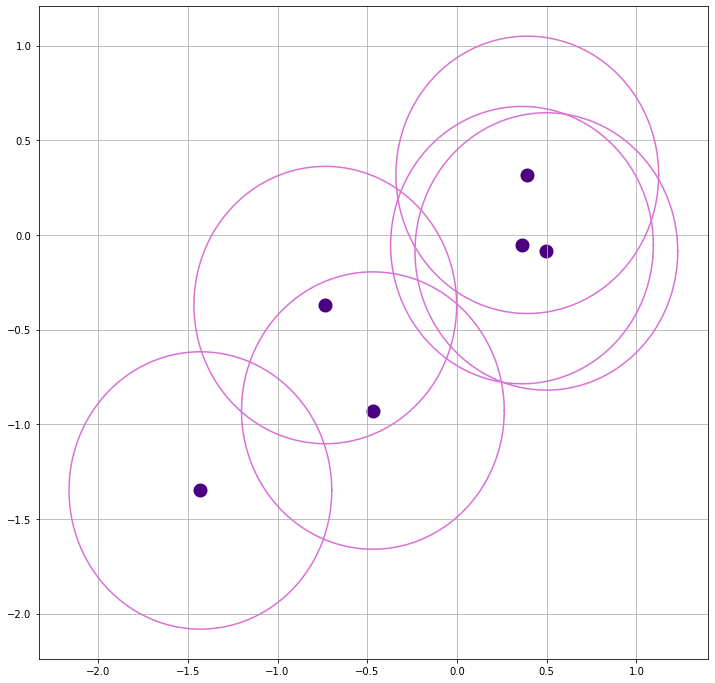

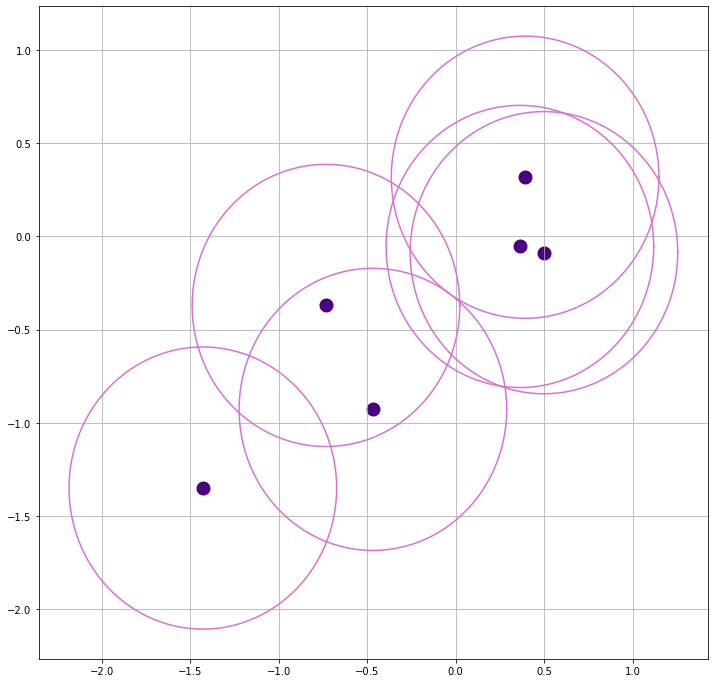

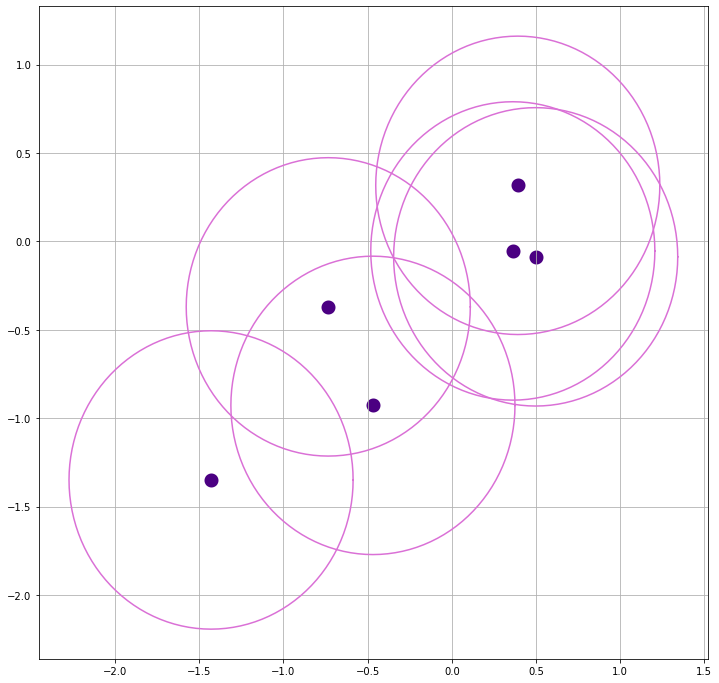

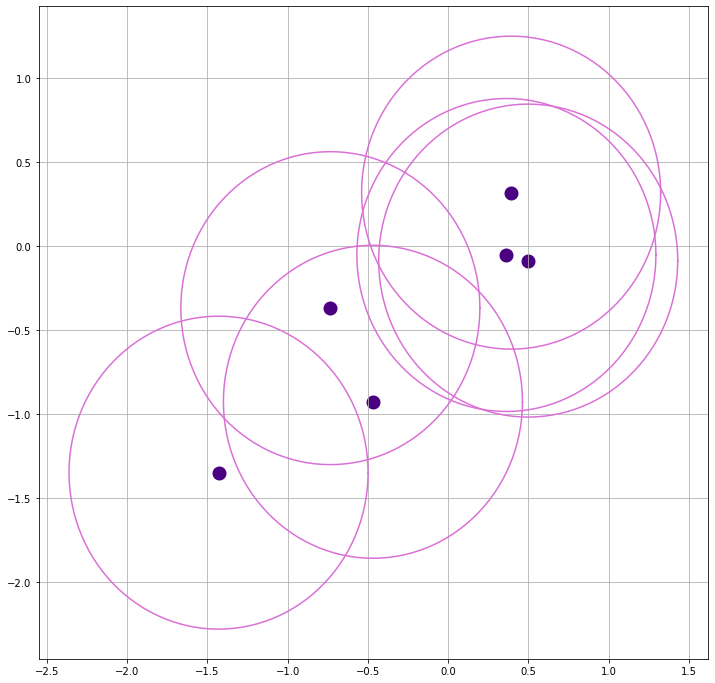

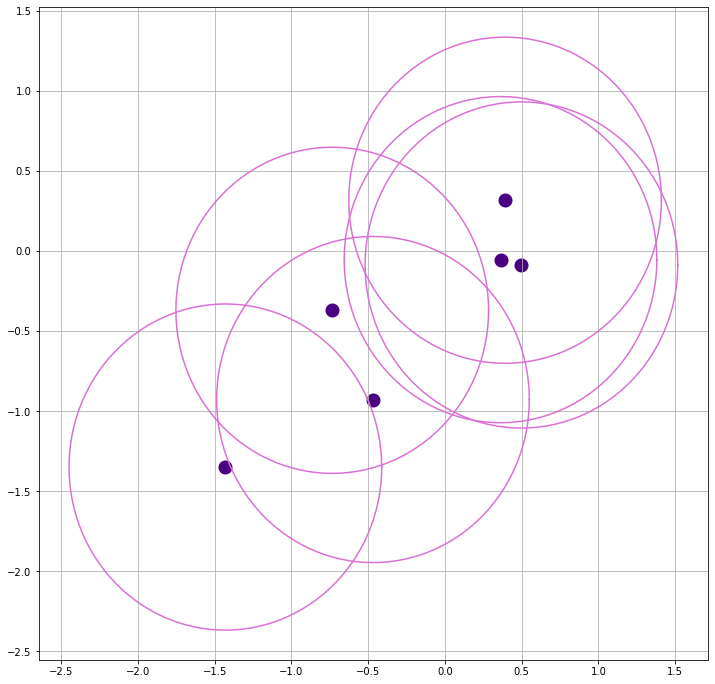

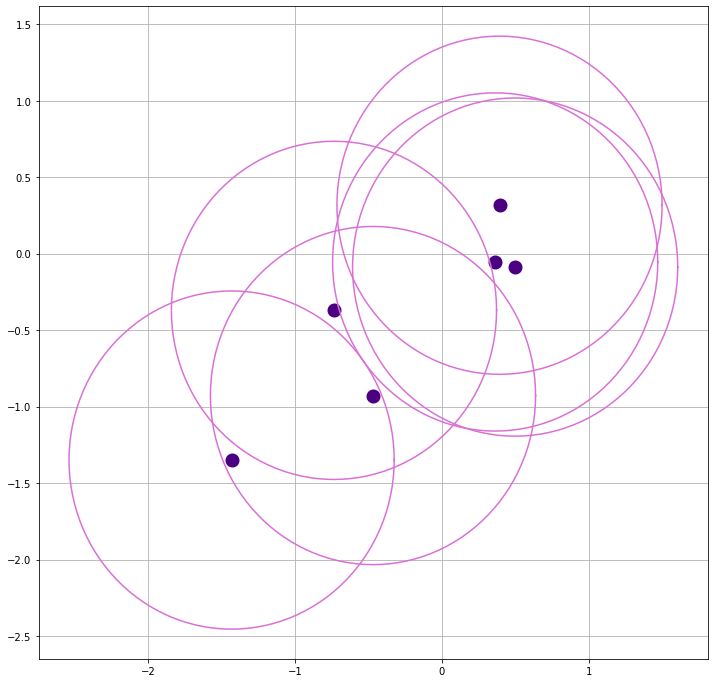

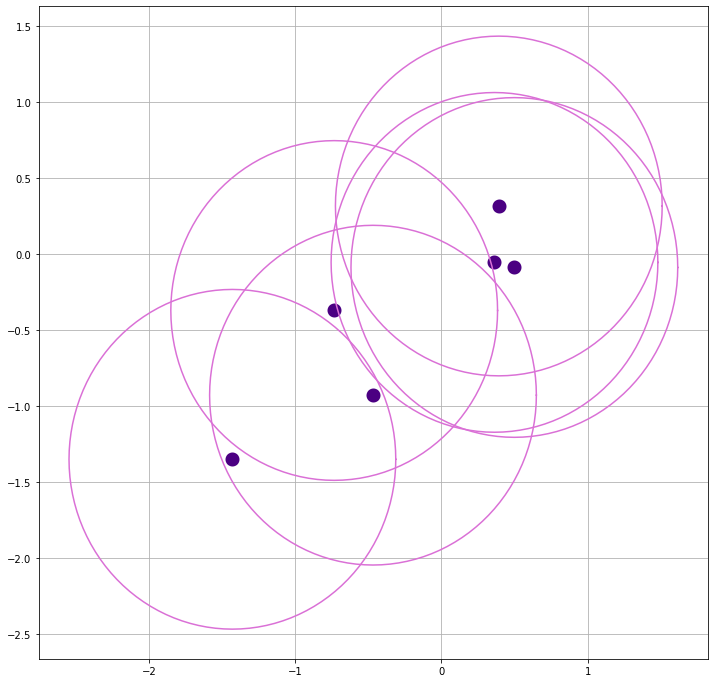

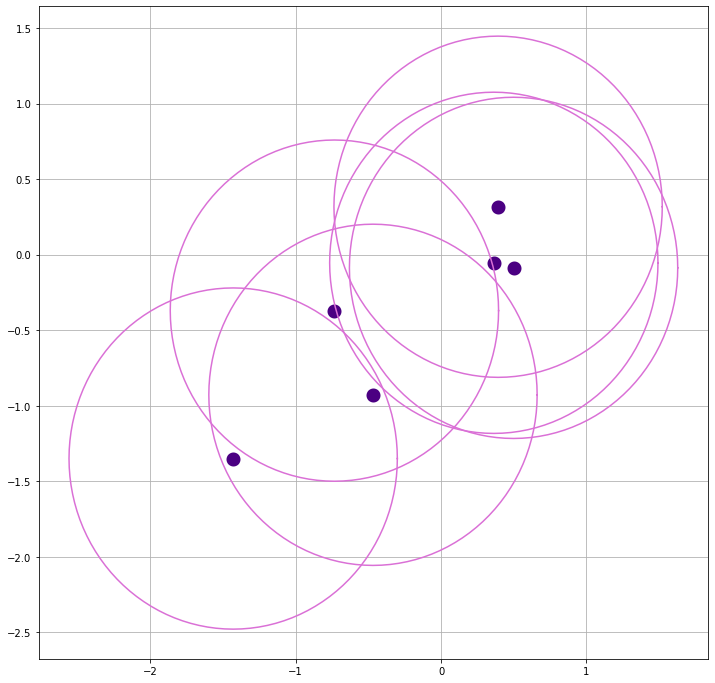

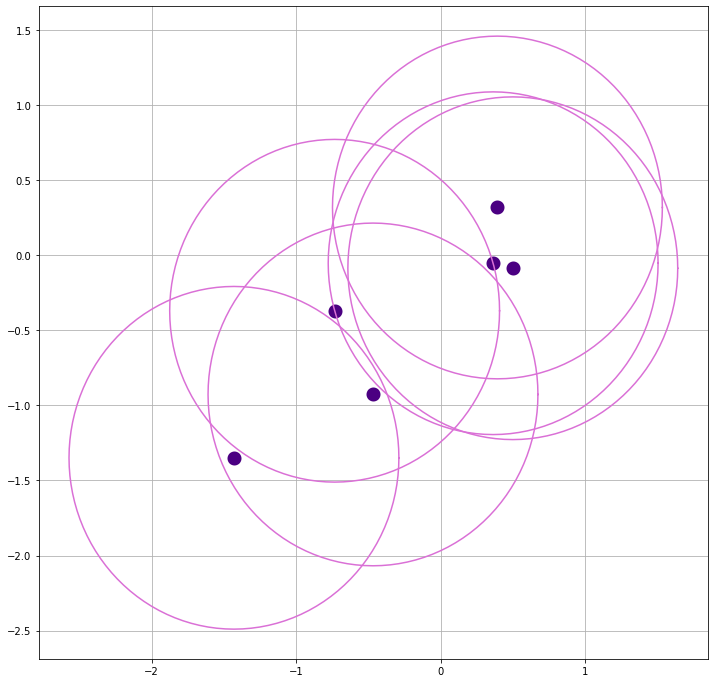

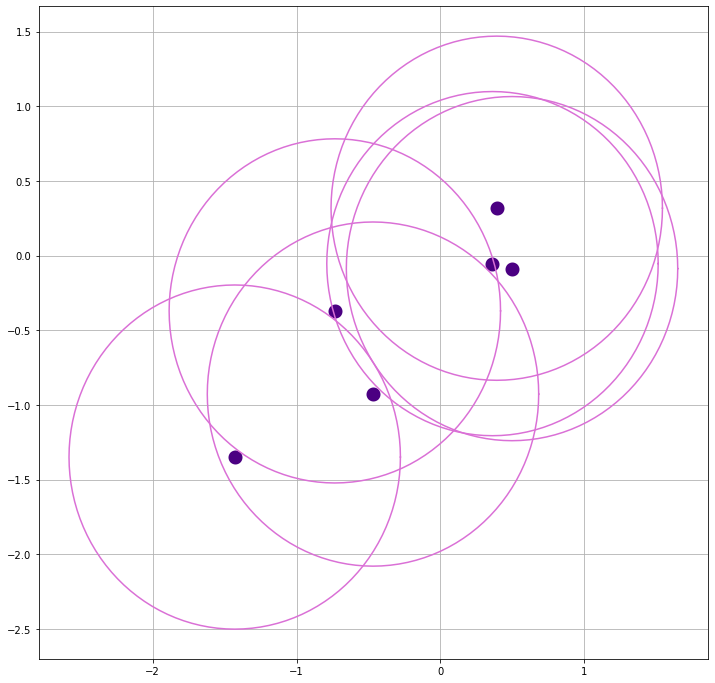

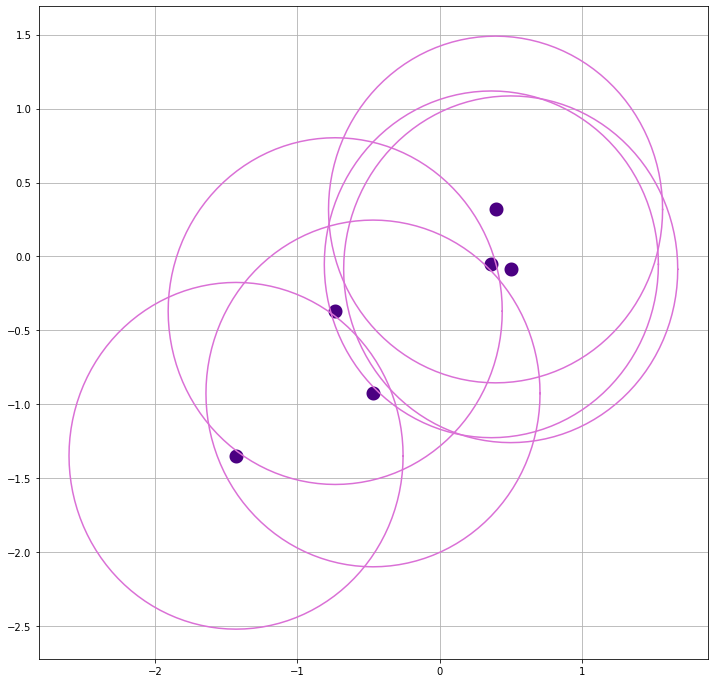

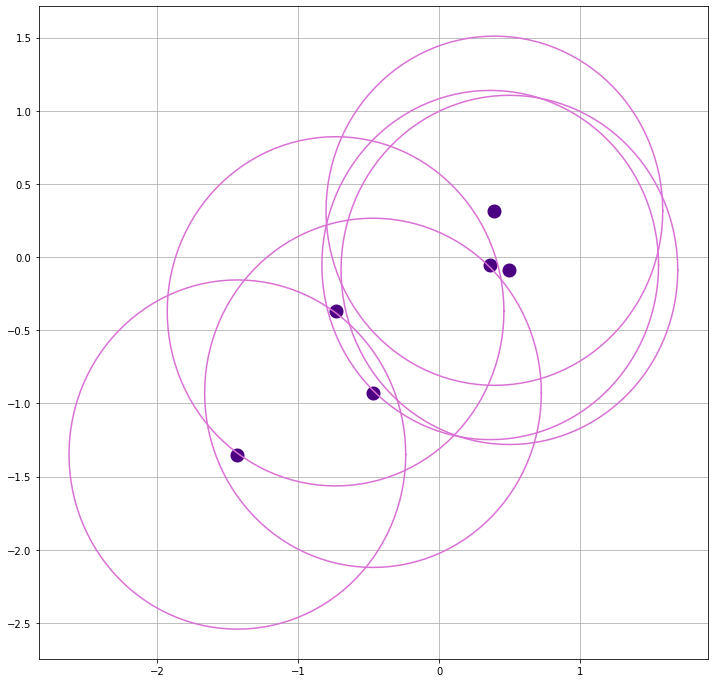

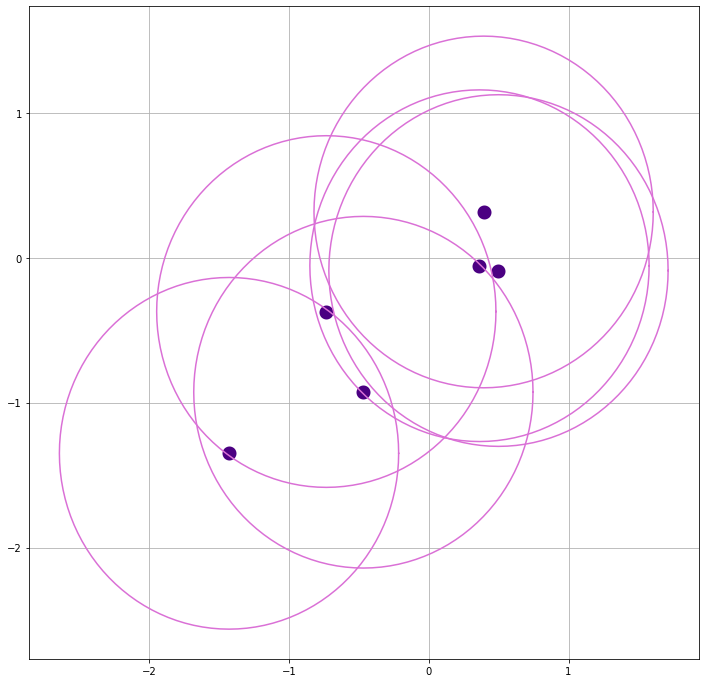

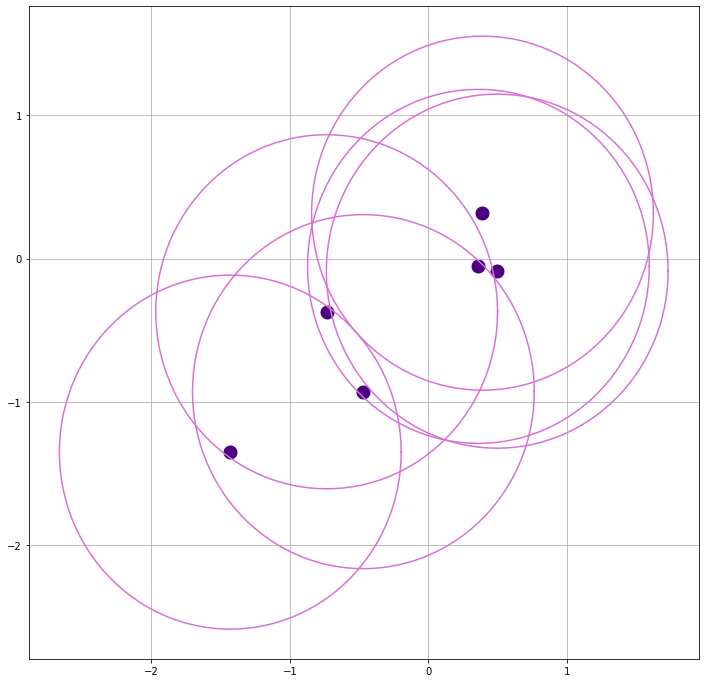

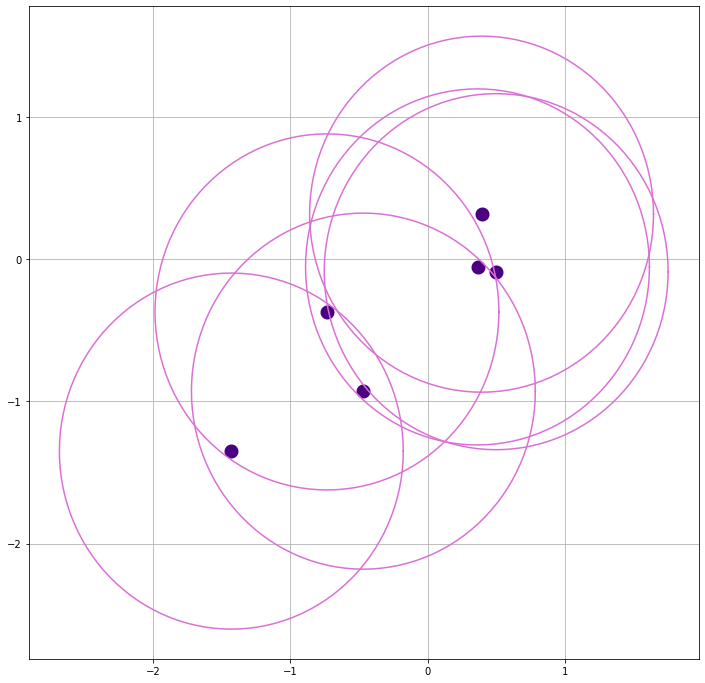

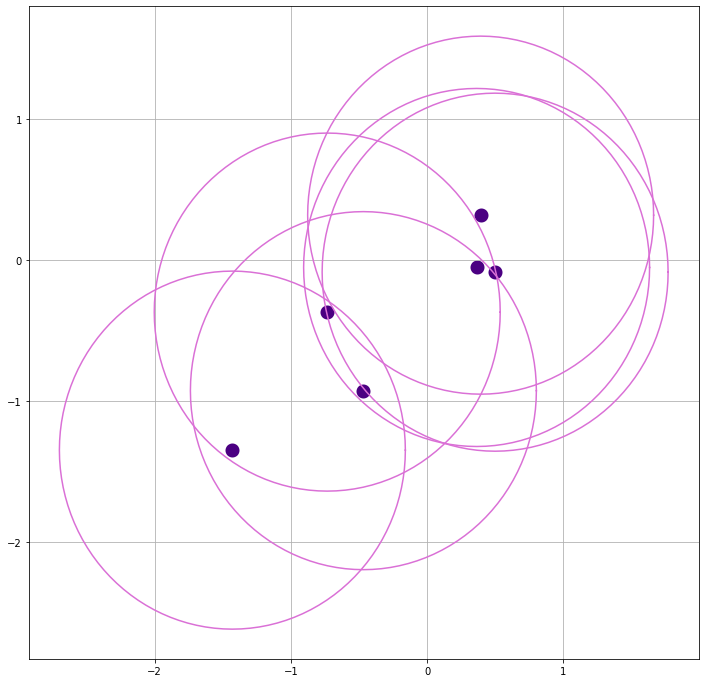

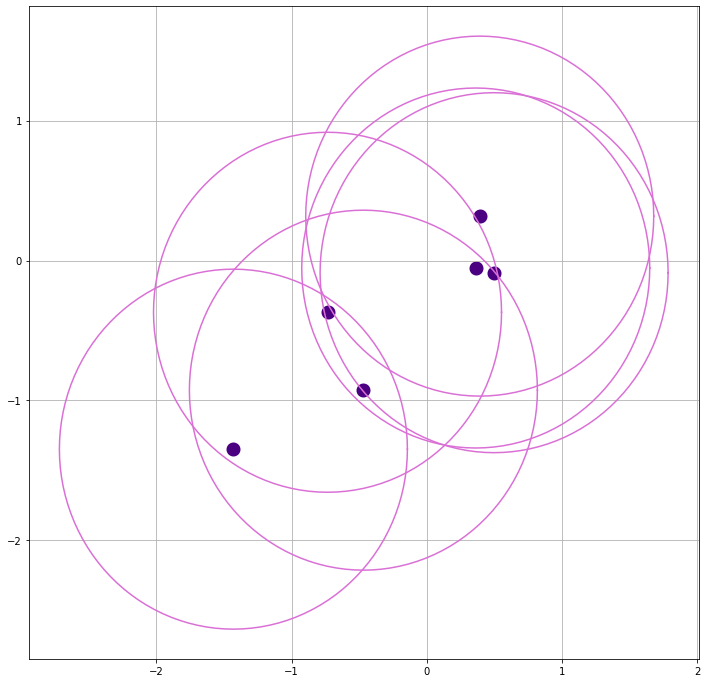

In [23]:
points_number = 120
circle_cos = np.cos(2*np.pi*np.arange(points_number+1)/points_number)
circle_sin = np.sin(2*np.pi*np.arange(points_number+1)/points_number)

for r in radiuses:
    plt.figure(figsize=(12, 12))
    for i in range(x.shape[0]):
        p = x[i]
        plt.plot(p[0] + r*circle_cos, p[1] + r*circle_sin, color='orchid')
        plt.scatter(p[0], p[1], color='indigo', linewidth=8)
    plt.grid(True)
    plt.savefig('pics/pic_' + str(n) + '_' + str(r).replace('.', '_') + '.png')

In [24]:
images = [imageio.imread('pics/pic_' + str(n) + '_' + str(r).replace('.', '_') + '.png') for r in radiuses]
imageio.mimsave('top_' + str(n) + '.gif', images)